In [0]:
%tensorflow_version 2.x
!pip show tensorflow
from google.colab import drive; drive.mount('/content/drive')


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [0]:
!pwd

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset


5


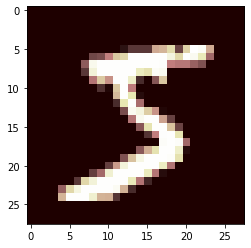

In [57]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="pink")
print(train_labels[0])


data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [0]:
train_steps =1000
learning_rate = 0.5

W = tf.Variable(np.zeros([784, 10]).astype(np.float32))
b = tf.Variable(np.zeros(10, dtype=np.float32))

In [0]:
num_nodes = 256
w0=tf.Variable(tf.random.normal([784,num_nodes]), -0.1, 0.1 )
b0=tf.Variable(tf.random.normal([num_nodes]), -0.1, 0.1)

w1=tf.Variable(tf.random.normal([num_nodes,10]), -0.1, 0.1)
b1=tf.Variable(tf.random.normal ([10]), -0.1, 0.1)

In [68]:
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        preactivation_hidden= tf.matmul(img_batch,w0)+b0
        activation= tf.nn.sigmoid(preactivation_hidden)
        

        logits = tf.matmul(activation, w1) + b1
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [w1, b1])
    w1.assign_sub(learning_rate * grads[0])
    b1.assign_sub(learning_rate * grads[1])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 15.45856761932373 Accuracy: 0.0703125
Loss: 1.8043280839920044 Accuracy: 0.6875
Starting new epoch...
Loss: 0.7379277944564819 Accuracy: 0.8125
Loss: 1.1070822477340698 Accuracy: 0.7265625
Loss: 0.7493173480033875 Accuracy: 0.8515625
Loss: 0.764080286026001 Accuracy: 0.8125
Starting new epoch...
Loss: 0.9205516576766968 Accuracy: 0.796875
Loss: 0.9014157056808472 Accuracy: 0.859375
Loss: 0.871333122253418 Accuracy: 0.8203125
Loss: 0.8657811880111694 Accuracy: 0.8203125


In [0]:
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(img_batch, W) + b
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [W, b])
    W.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

In [69]:
test_preds = tf.matmul(data.test_data, w0) + b0
test_preds1 = tf.argmax(tf.matmul(test_preds, w1) + b1, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds1, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.6971, shape=(), dtype=float32)
